In [ ]:
# Team - EcoStats (Karan Sheth - 114362694, Wing Au - 112495536, Liting Chiang - 112749075)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/MyDrive/Big_Data_Analytics/BDA_Project/World_Values_Survey'

/content/gdrive/MyDrive/Big_Data_Analytics/BDA_Project/World_Values_Survey


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wvs_3 = pd.read_csv('WVS_3_Final')
wvs_4 = pd.read_csv('WVS_4_Final')
wvs_5 = pd.read_csv('WVS_5_Final')
wvs_6 = pd.read_csv('WVS_6_Final')
wvs_7 = pd.read_csv('WVS_7_Final')

<b><h3> Merging Preprocessed Data </h3></b> 

In [6]:
# Merging Preprocessed Data
wvs = wvs_7.append(wvs_6, ignore_index = True)
wvs = wvs.append(wvs_5, ignore_index = True)
wvs = wvs.append(wvs_4, ignore_index = True)
wvs = wvs.append(wvs_3, ignore_index = True)
wvs

,A_WAVE,YEAR,COUNTRY,Interest_Interview,Important_Family,Important_Friends,Important_Leisure,Important_Politics,Important_Work,Important_Religion,...,Decision_Experts,Decision_Army,Decision_Democratic,Respect_Human_Rights,National_Pride,Sex,Marital_Status,Employment_Status,Family_Savings,Scale_Of_Incomes
0,7,2018,20,1,1,1,1,3,1,4,...,4,4,2,2,5,2,1,1,3,5
1,7,2018,20,1,1,1,1,4,1,4,...,4,4,2,1,1,1,2,1,1,9
2,7,2018,20,1,1,2,2,2,3,3,...,2,4,2,1,3,1,4,1,2,5
3,7,2018,20,2,1,1,1,4,2,4,...,2,4,2,2,5,2,2,1,2,4
4,7,2018,20,2,1,1,1,3,1,3,...,3,4,2,2,5,1,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396036,3,1997,76,2,2,2,2,4,2,1,...,2,2,-1,-4,2,1,1,4,2,1
396037,3,1997,76,1,1,1,1,2,1,2,...,4,4,2,-4,1,1,1,4,2,1
396038,3,1997,76,2,1,1,2,2,1,1,...,1,2,1,-4,3,1,1,1,3,1
396039,3,1997,76,3,1,1,2,-1,2,1,...,-1,-1,-1,-4,1,1,6,1,2,1


<b><h3> Feature Selection </h3> </b>

In [7]:
# Feature Selection
wvs[wvs<0] = 0
negative = (wvs == 0).sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(negative)

A_WAVE                                       0
YEAR                                         0
COUNTRY                                      0
Interest_Interview                       34555
Important_Family                          6448
Important_Friends                         7828
Important_Leisure                        10144
Important_Politics                       13137
Important_Work                           10568
Important_Religion                       11200
Important_Child_Independence               927
Important_Child_Hard_Work                 2898
Important_Child_Responsibility             434
Important_Child_Imagination               4513
Important_Child_Respect                    527
Important_Child_Saving_Money              1004
Important_Child_Determination             7492
Important_Child_Religious_Faith           3157
Important_Child_Unselfishness             4432
Important_Child_Obedience                 1085
Important_Neighbor_Drug                  22382
Important_Nei

In [8]:
wvs = wvs.drop(['Interest_Interview', 'Confidence_Labor_Unions', 'Confidence_Environment_Protection', 'Confidence_Women_Movement', 'Willingness_Fight_Country', 'Joining_Boycotts', 'Attend_Lawful_Demonstrations', 'Respect_Human_Rights'], axis = 1)

In [9]:
# wvs.to_csv('WVS_Final', encoding='utf-8', index=False)

In [10]:
print(wvs.columns)

Index(['A_WAVE', 'YEAR', 'COUNTRY', 'Important_Family', 'Important_Friends',
       'Important_Leisure', 'Important_Politics', 'Important_Work',
       'Important_Religion', 'Important_Child_Independence',
       'Important_Child_Hard_Work', 'Important_Child_Responsibility',
       'Important_Child_Imagination', 'Important_Child_Respect',
       'Important_Child_Saving_Money', 'Important_Child_Determination',
       'Important_Child_Religious_Faith', 'Important_Child_Unselfishness',
       'Important_Child_Obedience', 'Important_Neighbor_Drug',
       'Important_Neighbor_Different_race', 'Neighbors_Heavy_Drinkers',
       'Housewife_Fulfilling', 'Men_More_Right_Women_Job',
       'Priority_Nation_Immigrants', 'Less_Importance_Work',
       'Importance_Technology', 'Importance_Authority', 'Feeling_of_Happiness',
       'State_Of_Health', 'Freedom_Of_Choice', 'Satisfaction_With_Life',
       'Satisfaction_With_Financial_Situation', 'People_Trusted',
       'Confidence_Churches', 'Confide

In [11]:
wvs = wvs.drop(['Justify_Accepting_Bribe', 'Justify_Cheating_Tax', 'Decision_Strong_Leader', 'Decision_Experts', 'Decision_Army', 'Aim_Country_2', 'Confidence_Political_parties', 'Confidence_Parliament', 'Confidence_Television', 'Important_Neighbor_Drug', 'Important_Child_Religious_Faith', 'Confidence_Churches', 'Importance_God', 'Religious_Person', 'Interest_Politics'], axis = 1)

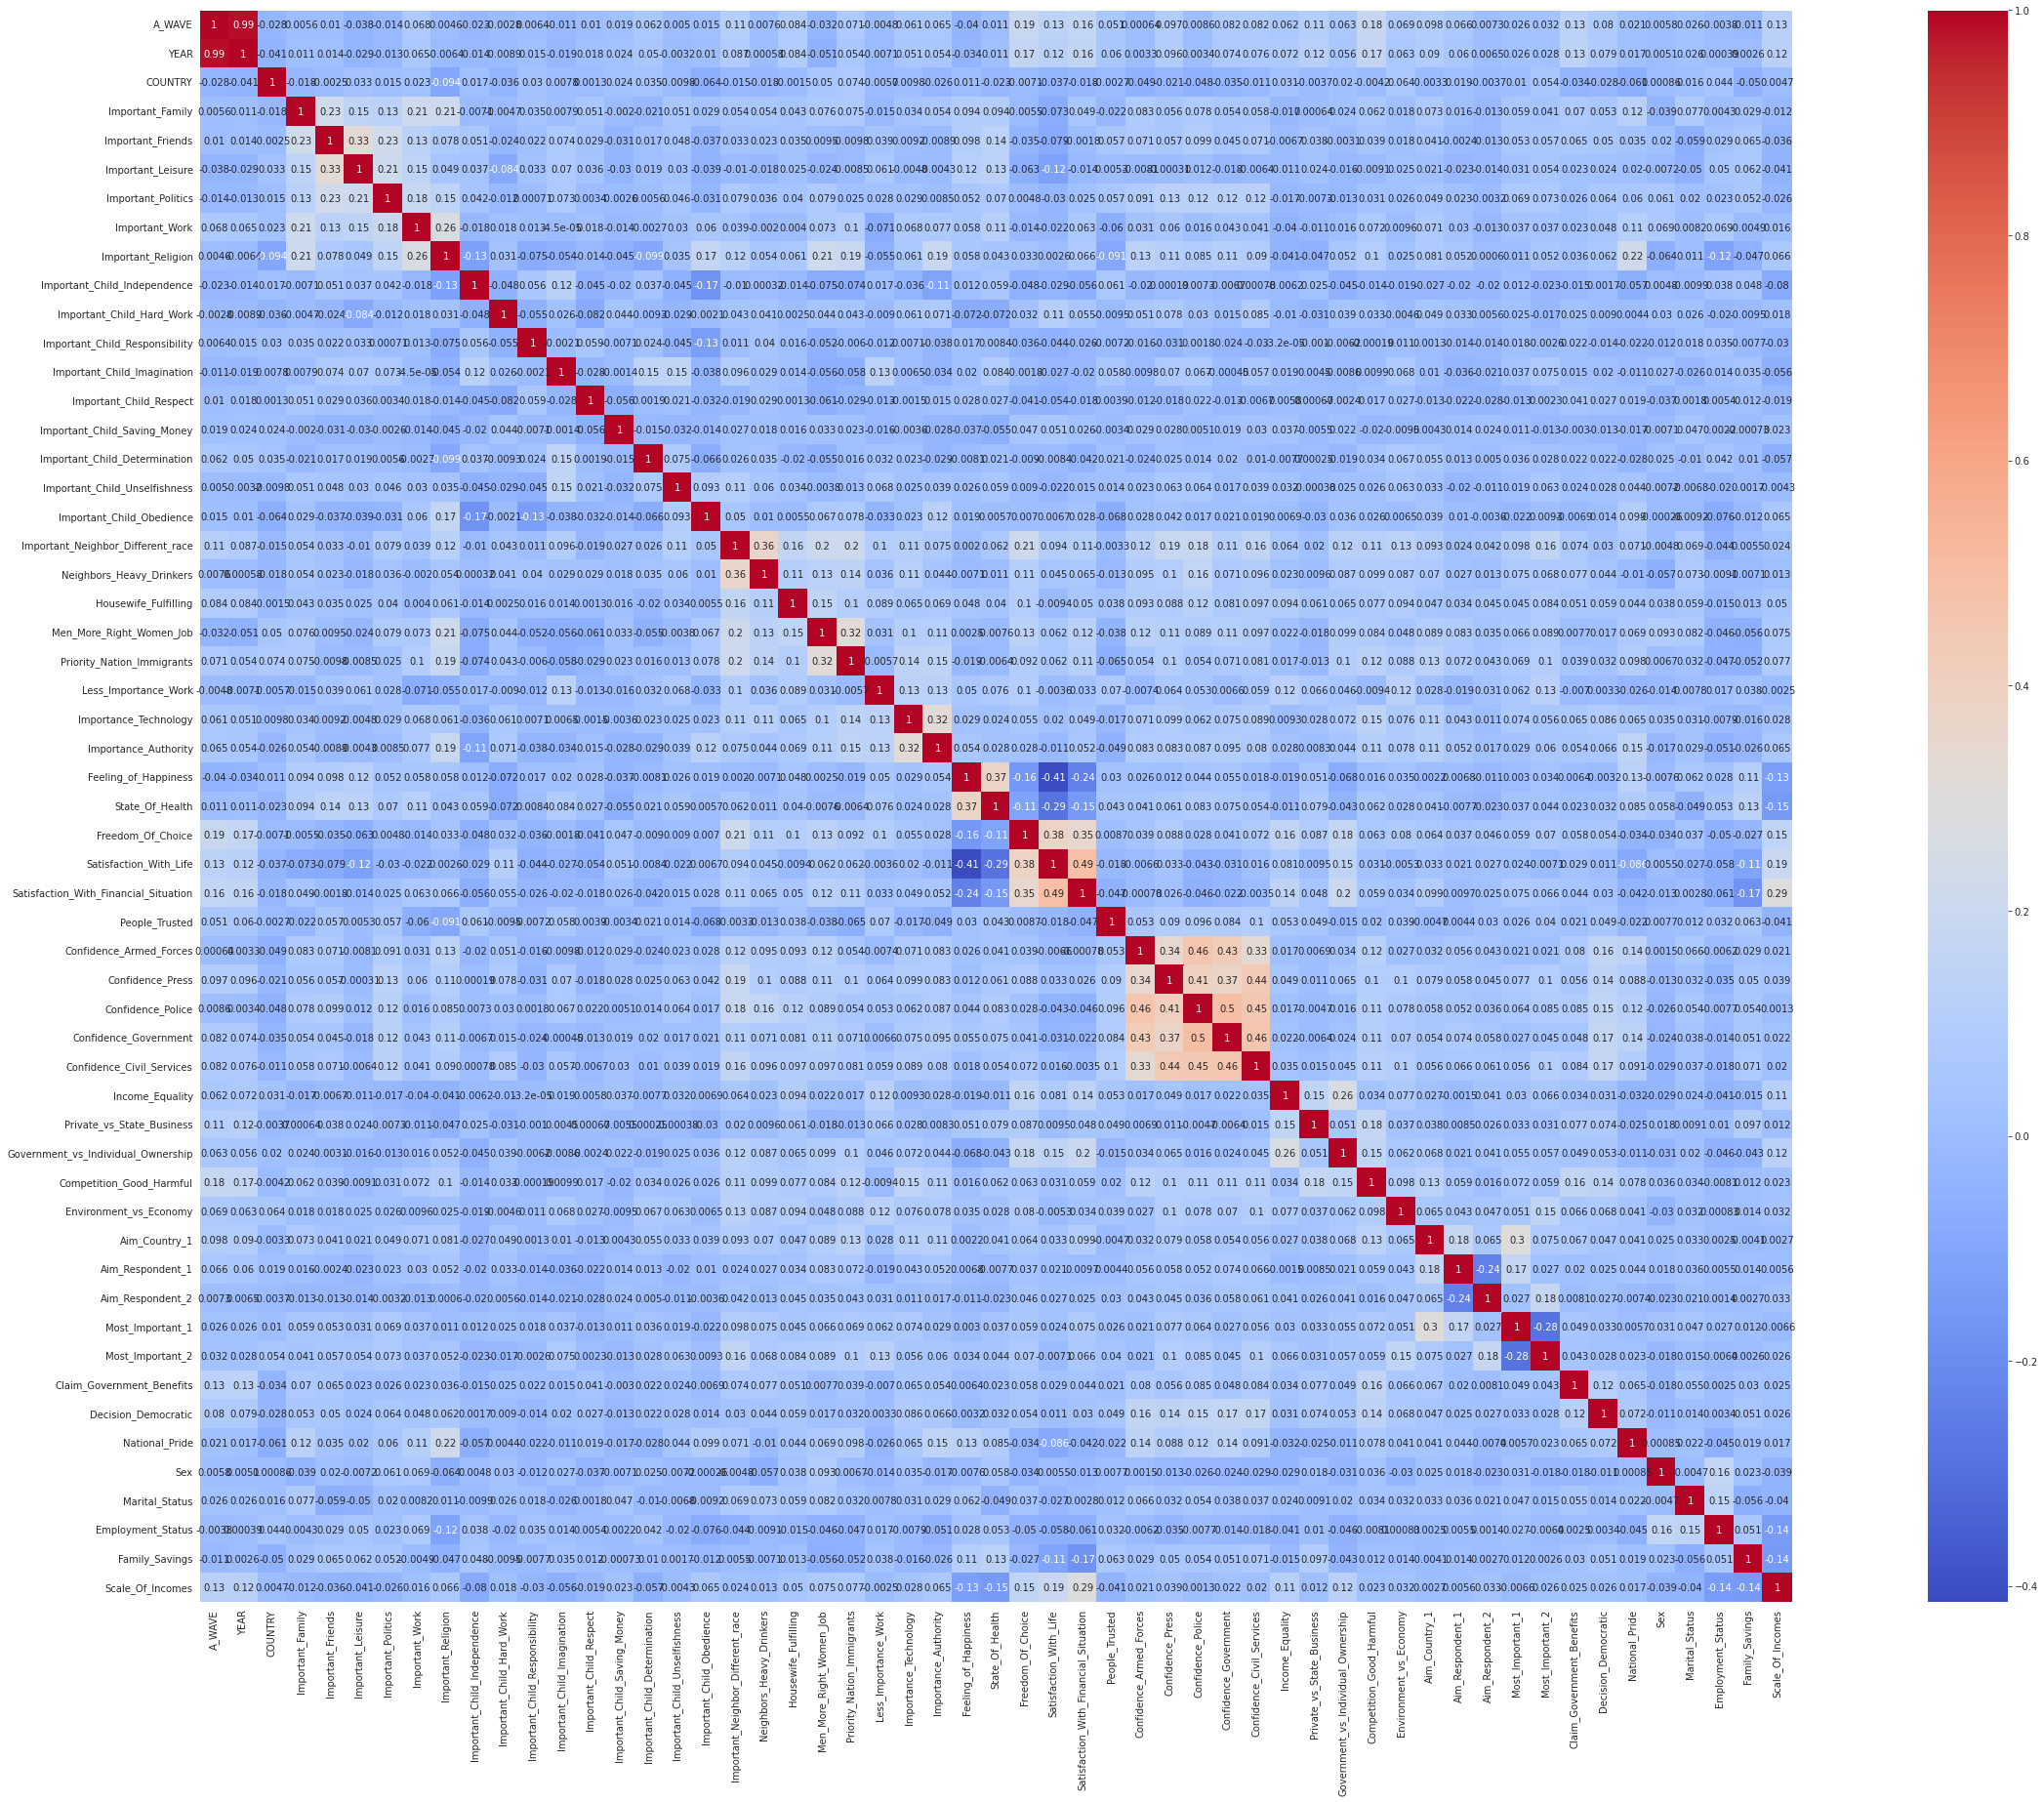

In [12]:
wvs_corr = wvs.corr()
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(50, 30))
  g=sns.heatmap(wvs_corr, vmax=1, square=True, annot=True, cmap="coolwarm")
  figure = g.get_figure()

In [13]:
# Analysis - Life Satisfaction of Countries (156-China, 458-Malaysia, 643-Russia, 702-Singapore, 756-Switzerland, 840-United States, 862-Venezuela) across years
analysis_1 = wvs[['YEAR', 'Satisfaction_With_Life', 'COUNTRY']]
analysis_1 = analysis_1[analysis_1['COUNTRY'].isin([156, 458, 643, 702, 756, 840, 862])].reset_index()

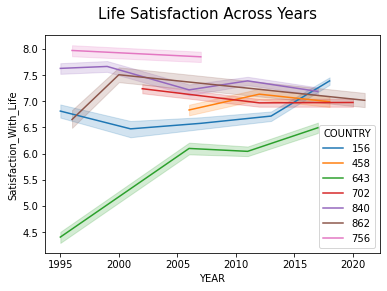

In [14]:
analysis = sns.lineplot(x=analysis_1['YEAR'], y=analysis_1['Satisfaction_With_Life'], hue=analysis_1['COUNTRY'].astype(str))
fig = analysis.get_figure()
fig.suptitle('Life Satisfaction Across Years', fontsize=15)
fig.savefig("Life Satisfaction Across Years.png") 

In [15]:
def change_1(x):
  if x >=1 and x <=4:
    x=1
  elif x>4 and x<=7:
    x=2
  elif x>7:
    x=3
  return x

wvs['Satisfaction_With_Life'] = wvs['Satisfaction_With_Life'].apply(change_1)

<b><h3> Train-Test Split</h3></b>

In [16]:
#Train-Test Data Split
train = wvs[wvs['YEAR']<2019]
test = wvs[wvs['YEAR']>=2019]

In [17]:
X_train = train.drop('YEAR', axis=1)
X_train = train.drop('Satisfaction_With_Life', axis=1)
X_test = test.drop('YEAR', axis=1)
X_test = test.drop('Satisfaction_With_Life', axis=1)
y_train = train['Satisfaction_With_Life']
y_test = test['Satisfaction_With_Life']

In [18]:
# X = wvs.drop('Satisfaction_With_Life', axis=1)
# y = wvs['Satisfaction_With_Life']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
wvs['A_WAVE'] = wvs.A_WAVE.astype('category')
# wvs['YEAR'] = wvs.YEAR.astype('category')
# wvs['COUNTRY'] = wvs.COUNTRY.astype('category')
labelencoder_1 = LabelEncoder()
# labelencoder_2 = LabelEncoder()
# labelencoder_3 = LabelEncoder()
X_train['A_WAVE'] = labelencoder_1.fit_transform(X_train['A_WAVE'])
# X_train['YEAR'] = labelencoder_2.fit_transform(X_train['YEAR'])
# X_train['COUNTRY'] = labelencoder_3.fit_transform(X_train['COUNTRY'])
X_test['A_WAVE'] = labelencoder_1.transform(X_test['A_WAVE'])
# X_test['YEAR'] = labelencoder_2.transform(X_test['YEAR'])
# X_test['COUNTRY'] = labelencoder_3.transform(X_test['COUNTRY'])

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Linear Regression
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [24]:
y_predict = clf.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.5797367883509877
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.43      0.64      0.51      4833
           2       0.65      0.25      0.36     14065
           3       0.61      0.87      0.72     15235

    accuracy                           0.58     34269
   macro avg       0.42      0.44      0.40     34269
weighted avg       0.60      0.58      0.54     34269



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Random Forest Hyperparameter Tuning using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold,GridSearchCV,cross_val_score

classifier_rfg=RandomForestClassifier(random_state=42, n_estimators=200)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
print(model_gridrf.best_params_)

In [ ]:
y_predict = model_gridrf.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

In [25]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold,GridSearchCV,cross_val_score

model_rf=RandomForestClassifier(random_state=42,n_estimators=200, criterion="entropy", min_samples_leaf=2, min_samples_split=4)
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=200, random_state=42)

In [26]:
y_predict = model_rf.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.677492777729143
              precision    recall  f1-score   support

           0       0.91      0.15      0.25       136
           1       0.68      0.36      0.47      4833
           2       0.63      0.68      0.65     14065
           3       0.71      0.78      0.75     15235

    accuracy                           0.68     34269
   macro avg       0.74      0.49      0.53     34269
weighted avg       0.68      0.68      0.67     34269



In [27]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,y_predict)

array([[[34131,     2],
        [  116,    20]],

       [[28635,   801],
        [ 3095,  1738]],

       [[14717,  5487],
        [ 4544,  9521]],

       [[14272,  4762],
        [ 3297, 11938]]])

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
y_predict = model.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.6514342408590855
              precision    recall  f1-score   support

           0       0.67      0.01      0.03       136
           1       0.64      0.38      0.48      4833
           2       0.59      0.69      0.63     14065
           3       0.73      0.71      0.72     15235

    accuracy                           0.65     34269
   macro avg       0.66      0.45      0.46     34269
weighted avg       0.66      0.65      0.65     34269



In [30]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,y_predict)

array([[[34132,     1],
        [  134,     2]],

       [[28422,  1014],
        [ 3002,  1831]],

       [[13321,  6883],
        [ 4322,  9743]],

       [[14987,  4047],
        [ 4487, 10748]]])

In [31]:
# XG Boost Classifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
model_xgb = OneVsRestClassifier(XGBClassifier())
model_xgb.fit(X_train,y_train)

OneVsRestClassifier(estimator=XGBClassifier())

In [32]:
y_predict_xgb = model_xgb.predict(X_test)
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.6834164988765357
              precision    recall  f1-score   support

           0       0.82      0.44      0.57       136
           1       0.67      0.43      0.53      4833
           2       0.64      0.69      0.66     14065
           3       0.72      0.76      0.74     15235

    accuracy                           0.68     34269
   macro avg       0.71      0.58      0.63     34269
weighted avg       0.68      0.68      0.68     34269



In [33]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,y_predict_xgb)

array([[[34120,    13],
        [   76,    60]],

       [[28391,  1045],
        [ 2738,  2095]],

       [[14868,  5336],
        [ 4406,  9659]],

       [[14579,  4455],
        [ 3629, 11606]]])